In [1]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
from PIL import Image
import os 
from tqdm.notebook import tqdm

In [2]:
dataset = []
classes = os.listdir('mnist')
for Class in classes:
    for image in tqdm(os.listdir(f'mnist/{Class}/')):
        dataset.append(f'mnist/{Class}/{image}')

len(dataset)

  0%|          | 0/5911 [00:00<?, ?it/s]

  0%|          | 0/6730 [00:00<?, ?it/s]

12641

In [3]:
trainloader = []
for i in tqdm(dataset):
    image = Image.open(i)
    imgarr = np.asarray(image)
    x = np.sum(imgarr)/784
    y = np.sum(imgarr-imgarr.T)/784
    label = int(i.split('/')[1])
    trainloader.append([x,y,label])
len(trainloader)

  0%|          | 0/12641 [00:00<?, ?it/s]

12641

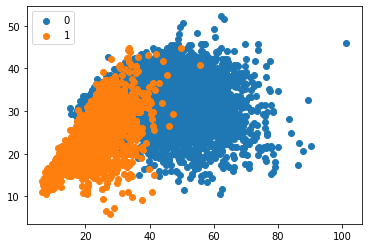

In [4]:
f10 = [i[0] for i in trainloader[:5911]] #feature 1 (x) for 0
f20 = [i[1] for i in trainloader[:5911]] #feature 2 (y) for 0
f11 = [i[0] for i in trainloader[5911:]] #feature 1 (x) for 1
f21 = [i[1] for i in trainloader[5911:]] #feature 2 (y) for 1

plt.scatter(f10,f20,label='0')
plt.scatter(f11,f21,label='1')
plt.legend()

In [5]:
hypothesis = lambda x,y,a,b,c: 1/(1+np.exp(-(a*x+b*y+c)))

def BCELoss(label,pred):
    return -label*np.log(pred) -(1-label)*np.log(1-pred)

def gradients(x,y,pred,label):
    dc = (pred-label)
    da = dc*x
    db = dc*y
    return da,db,dc

def training(epochs,lr=0.01):
    a,b,c = 2,5,6

    for e in range(epochs):
        for data in trainloader:
            x,y,label=data
            yhat = hypothesis(x,y,a,b,c)
            l = BCELoss(label,yhat)
            da,db,dc=gradients(x,y,yhat,label)
            
            a-= lr*da
            b-= lr*db
            c-= lr*dc
            
            if (e+1)%200==0:
                plt.figure()
                y0 = -(a/b)*min(f11) -c/b
                y1 = -(a/b)*max(f10) -c/b
                plt.scatter(f10,f20,label='0')
                plt.scatter(f11,f21,label='1')
                plt.legend()
                plt.plot([min(f11),max(f10)],[y0,y1])
                plt.title("a {:.4}   b {:.4}   c {:.4}".format(a,b,c))
            


In [6]:
training(1)

C:\Users\Samba\AppData\Local\Temp\ipykernel_17080\1630394827.py:4: RuntimeWarning: divide by zero encountered in log
  return -label*np.log(pred) -(1-label)*np.log(1-pred)
C:\Users\Samba\AppData\Local\Temp\ipykernel_17080\1630394827.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return -label*np.log(pred) -(1-label)*np.log(1-pred)
